In [46]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [110]:
application_train= dd.read_csv("../../data/application_train.csv").compute()
a = application_train.shape
print("application_train shape :({},{})".format( a[0],a[1]))

application_train shape :(307511,122)


In [111]:
non_risque=application_train[application_train.TARGET==0]
risque=application_train[application_train.TARGET==1]

In [3]:
px.pie(values=application_train.TARGET.value_counts(),names=application_train.TARGET.value_counts().index)

<h3><b>Interpretation :</b></h3>
Colonne TARGET déséquilibrés !!

91.9% qui n'ont pas eu de probléme de paiement et 8.07% qui ont eu un probleme de paiement

<h2>TARGET / CODE_GENDER</h2>

In [9]:

print("Pourcentage des femmes",(application_train[application_train.CODE_GENDER=="F"].count()/application_train.count())["TARGET"])
print("Pourcentage femme non risque",(non_risque[non_risque.CODE_GENDER=="F"].count()/application_train[application_train.CODE_GENDER=="F"].count())["TARGET"])
print("Pourcentage des hommes",(application_train[application_train.CODE_GENDER=="M"].count()/application_train.count())["TARGET"])
print("Pourcentage homme non risque",(non_risque[non_risque.CODE_GENDER=="M"].count()/application_train[application_train.CODE_GENDER=="M"].count())["TARGET"])

Pourcentage des femmes 0.6583439291602576
Pourcentage femme non risque 0.9300067177744409
Pourcentage des hommes 0.34164306317497584
Pourcentage homme non risque 0.8985807974566672


<h3><b>Interpretation :</b></h3>
Il semble que le pourcentage des hommes qui paient leurs credits sans probleme est plus que les femmes

<h2>TARGET / NAME_CONTRACT_TYPE</h2>

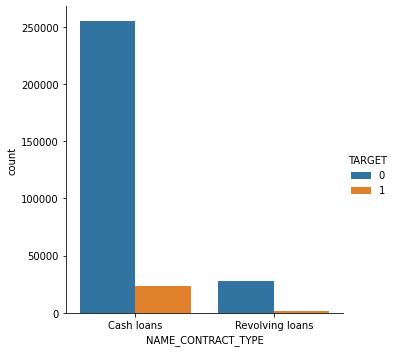

In [10]:
sns.catplot(x='NAME_CONTRACT_TYPE', kind="count",hue='TARGET', data=application_train)

In [12]:
print("Pourcentage des Cash loans",(application_train[application_train.NAME_CONTRACT_TYPE=="Cash loans"].count()/application_train.count())["TARGET"])
print("Pourcentage des Cash loans non risque",(non_risque[non_risque.NAME_CONTRACT_TYPE=="Cash loans"].count()/application_train[application_train.NAME_CONTRACT_TYPE=="Cash loans"].count())["TARGET"])
print("Pourcentage des Revolving loans",(application_train[application_train.NAME_CONTRACT_TYPE=="Revolving loans"].count()/application_train.count())["TARGET"])
print("Pourcentage des Revolving loans non risque",(non_risque[non_risque.NAME_CONTRACT_TYPE=="Revolving loans"].count()/application_train[application_train.NAME_CONTRACT_TYPE=="Revolving loans"].count())["TARGET"])

Pourcentage des Cash loans 0.9047871458256778
Pourcentage des Cash loans non risque 0.916540872365508
Pourcentage des Revolving loans 0.09521285417432222
Pourcentage des Revolving loans non risque 0.9452167082209092


<h3><b>Interpretation :</b></h3>
<ul>
<li>Pratiquement tous les clients prends Cash Loans </li>
<li>Les clients risqués prends Revolving loans que les Cash loans</li>
</ul>


<h2>TARGET / FLAG_OWN_CAR</h2>

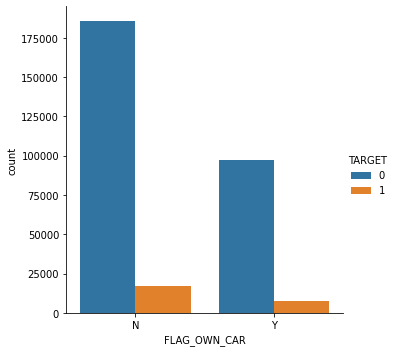

In [13]:
sns.catplot(x='FLAG_OWN_CAR', kind="count",hue='TARGET', data=application_train)

In [16]:
print("Pourcentage des gens qui ne possede pas de voiture",(application_train[application_train.FLAG_OWN_CAR=="N"].count()/application_train.count())["TARGET"])
print("Pourcentage des gens qui ne possede pas de voiture non risque",(non_risque[non_risque.FLAG_OWN_CAR=="N"].count()/application_train[application_train.FLAG_OWN_CAR=="N"].count())["TARGET"])
print("Pourcentage des gens qui possede de voiture",(application_train[application_train.FLAG_OWN_CAR=="Y"].count()/application_train.count())["TARGET"])
print("Pourcentage des gens qui possede de voiture non risque",(non_risque[non_risque.FLAG_OWN_CAR=="Y"].count()/application_train[application_train.FLAG_OWN_CAR=="Y"].count())["TARGET"])

Pourcentage des gens qui ne possede pas de voiture 0.6598918412674668
Pourcentage des gens qui ne possede pas de voiture non risque 0.9149977331414717
Pourcentage des gens qui possede de voiture 0.34010815873253314
Pourcentage des gens qui possede de voiture non risque 0.9275626989970073


<h3><b>Interpretation :</b></h3>
<ul>
<li>Les clients qui possédent une voiture sont risqués</li>
</ul>


<h2>TARGET / FLAG_OWN_REALTY</h2>

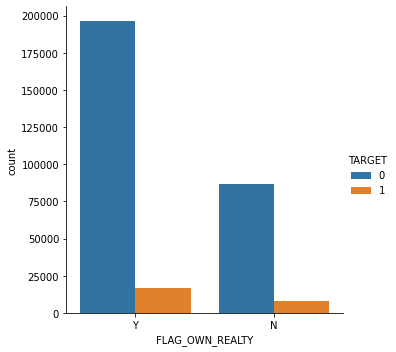

In [18]:
sns.catplot(x='FLAG_OWN_REALTY', kind="count",hue='TARGET', data=application_train)

In [19]:
print("Pourcentage des gens qui ne possede pas de maison",(application_train[application_train.FLAG_OWN_REALTY=="N"].count()/application_train.count())["TARGET"])
print("Pourcentage des gens qui ne possede pas de maison non risque",(non_risque[non_risque.FLAG_OWN_REALTY=="N"].count()/application_train[application_train.FLAG_OWN_REALTY=="N"].count())["TARGET"])
print("Pourcentage des gens qui possede de maison",(application_train[application_train.FLAG_OWN_REALTY=="Y"].count()/application_train.count())["TARGET"])
print("Pourcentage des gens qui possede de maison non risque",(non_risque[non_risque.FLAG_OWN_REALTY=="Y"].count()/application_train[application_train.FLAG_OWN_REALTY=="Y"].count())["TARGET"])

Pourcentage des gens qui ne possede pas de maison 0.30632725333402705
Pourcentage des gens qui ne possede pas de maison non risque 0.9167507086062485
Pourcentage des gens qui possede de maison 0.6936727466659729
Pourcentage des gens qui possede de maison non risque 0.9203842259225923


<h3><b>Interpretation :</b></h3>
<ul>
<li>Les clients qui ne possédent pas une maison sont risqués</li>
</ul>


<h2>TARGET / CNT_CHILDREN</h2>

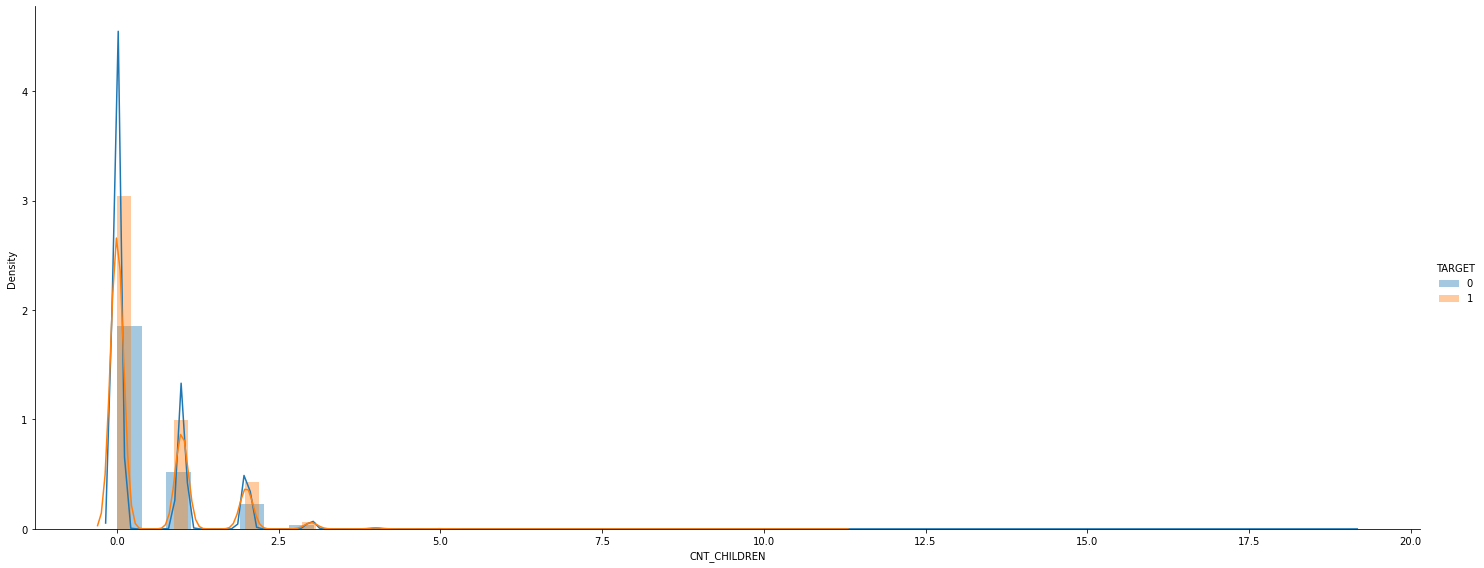

In [31]:
sns.FacetGrid(data=application_train, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'CNT_CHILDREN').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='CNT_CHILDREN'>

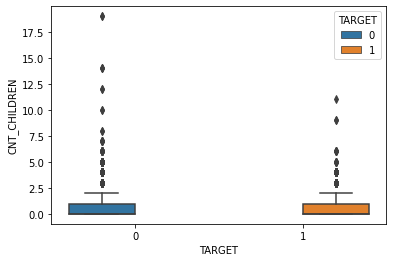

In [32]:
sns.boxplot(x='TARGET', y='CNT_CHILDREN',hue='TARGET', data=application_train)

<h3><b>Interpretation :</b></h3>
<ul>
<li>Pas d'influence sur la colonne cible</li>
<li>Présence des outliers CNT_CHILDREN > 2.5</li>
</ul>

<h2>TARGET / AMT_INCOME_TOTAL (Revenu du client)</h2>

In [36]:
application_train.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

* Intervalle large des revenus

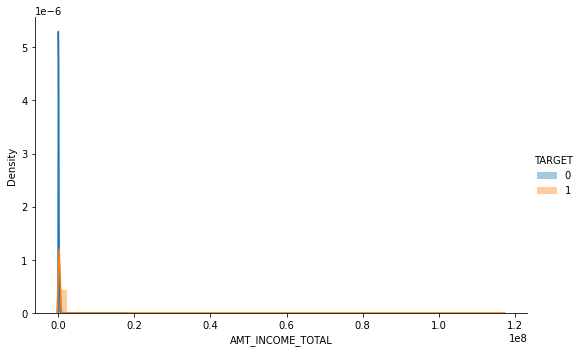

In [35]:
sns.FacetGrid(data=application_train, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'AMT_INCOME_TOTAL').add_legend()

* On peut rien conclure ici car l'inervalle est très large <br>
==> on applique Log10 pour zoomer

In [65]:
application_train_copy=application_train.copy()
application_train_copy[["AMT_INCOME_TOTAL"]]=np.log10(application_train_copy[["AMT_INCOME_TOTAL"]])

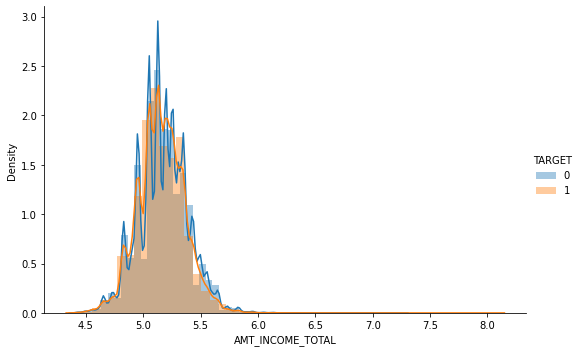

In [66]:
sns.FacetGrid(data=application_train_copy, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'AMT_INCOME_TOTAL').add_legend()

* Rien à conclure <br>
* Distribution presque la meme pour les deux classes

<AxesSubplot:xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

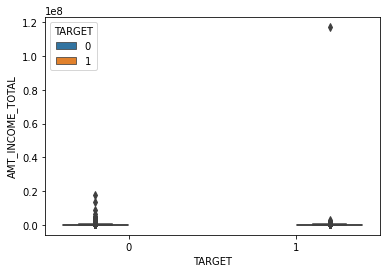

In [67]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL',hue='TARGET', data=application_train)

<Figure size 8640x2880 with 0 Axes>

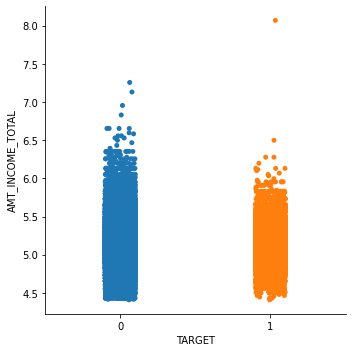

In [69]:
plt.figure(figsize=(120,40))
sns.catplot('TARGET','AMT_INCOME_TOTAL',data=application_train_copy)
plt.show()
del application_train_copy

<h3><b>Interpretation :</b></h3>
<ul>
<li>Le faible revenu affecte la capcité d'un pourcentage de client à rembourser le credit</li>
<li>Présence des outliers AMT_INCOME_TOTAL > 10 ^ 7</li>
</ul>

<h2>TARGET / AMT_CREDIT (Montant du crédit)</h2>

In [71]:
application_train.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

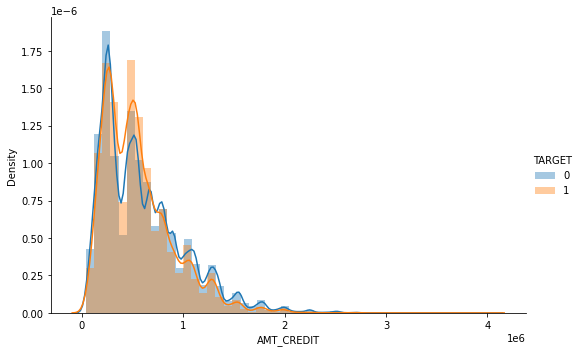

In [70]:
sns.FacetGrid(data=application_train, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'AMT_CREDIT').add_legend()

In [72]:
application_train_copy=application_train.copy()
application_train_copy[["AMT_CREDIT"]]=np.log10(application_train_copy[["AMT_CREDIT"]])

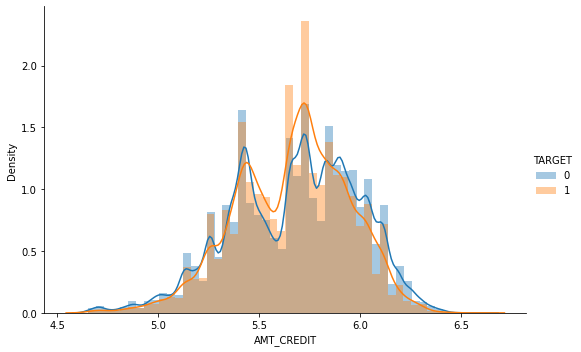

In [76]:
sns.FacetGrid(data=application_train_copy, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'AMT_CREDIT').add_legend()
del application_train_copy

* Entre 10 ^ 4.5 et 10 ^ 5.9 comme valeur de AMT_CRDIT la densite de la classe 1 et supp à la classe2  

<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT'>

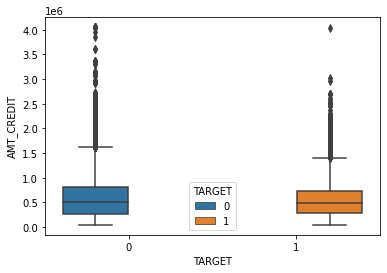

In [75]:
sns.boxplot(x='TARGET', y='AMT_CREDIT',hue='TARGET', data=application_train)

<h3><b>Interpretation :</b></h3>
<ul>
<li>Présence des outliers AMT_CREDIT > 1.6e6 pour la classe 0 et AMT_CREDIT > 1.4e6 pour la classe 1 </li>
</ul>

<h2>TARGET / AMT_ANNUITY (???)</h2>

In [77]:
application_train.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [78]:
application_train_copy=application_train.copy()
application_train_copy[["AMT_ANNUITY"]]=np.log10(application_train_copy[["AMT_ANNUITY"]])

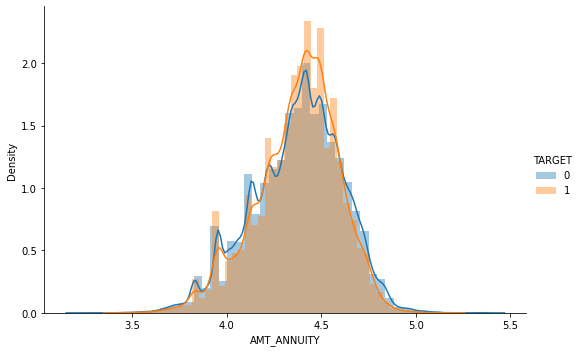

In [79]:
sns.FacetGrid(data=application_train_copy, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'AMT_ANNUITY').add_legend()
del application_train_copy

<AxesSubplot:xlabel='TARGET', ylabel='AMT_ANNUITY'>

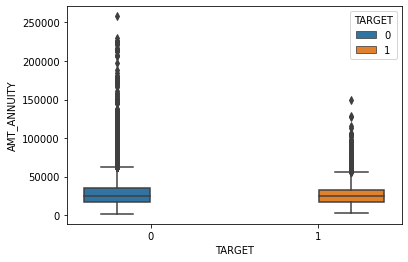

In [80]:
sns.boxplot(x='TARGET', y='AMT_ANNUITY',hue='TARGET', data=application_train)

<h3><b>Interpretation :</b></h3>
<ul>
<li>Présence des outliers pour les deux classes </li>
</ul>

<h2>TARGET / AMT_GOODS_PRICE (???)</h2>

In [83]:
application_train.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

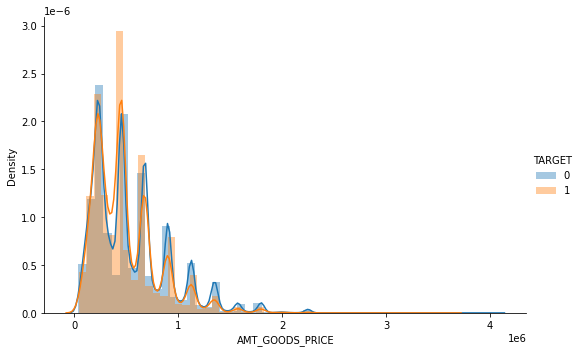

In [81]:
sns.FacetGrid(data=application_train, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'AMT_GOODS_PRICE').add_legend()

In [84]:
application_train_copy=application_train.copy()
application_train_copy[["AMT_GOODS_PRICE"]]=np.log10(application_train_copy[["AMT_GOODS_PRICE"]])

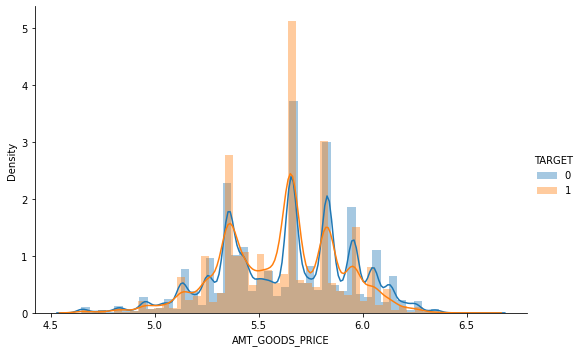

In [85]:
sns.FacetGrid(data=application_train_copy, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'AMT_GOODS_PRICE').add_legend()
del application_train_copy

* Entre 10 ^ 5.2 et 10 ^ 5.7 comme valeur de AMT_GOODS_PRICE la densite de la classe 1 et supp à la classe2  

<AxesSubplot:xlabel='TARGET', ylabel='AMT_GOODS_PRICE'>

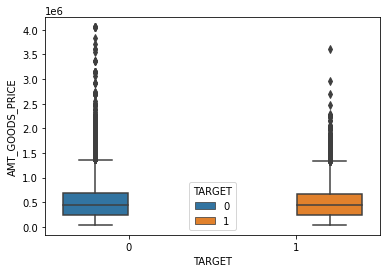

In [86]:
sns.boxplot(x='TARGET', y='AMT_GOODS_PRICE',hue='TARGET', data=application_train)

<h3><b>Interpretation :</b></h3>
<ul>
<li>Présence des outliers pour les deux classes </li>
</ul>

<h2>TARGET / NAME_TYPE_SUITE (Qui accompagnait le client lors de la demande du credit)</h2>

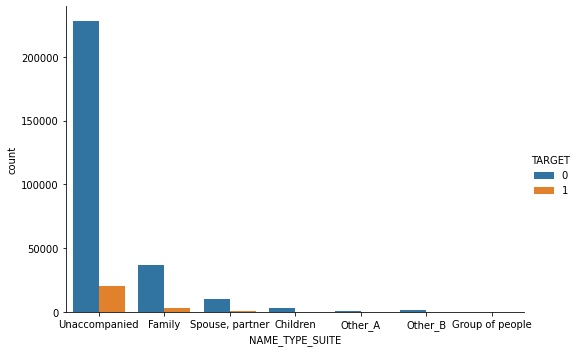

In [89]:
sns.catplot(x='NAME_TYPE_SUITE', kind="count",hue='TARGET', aspect=1.5, height=5,data=application_train)

<h3><b>Interpretation :</b></h3>
<ul>
<li>Rien à conclure</li>
</ul>

<h2>TARGET / NAME_INCOME_TYPE (Type de revenu du client)</h2>

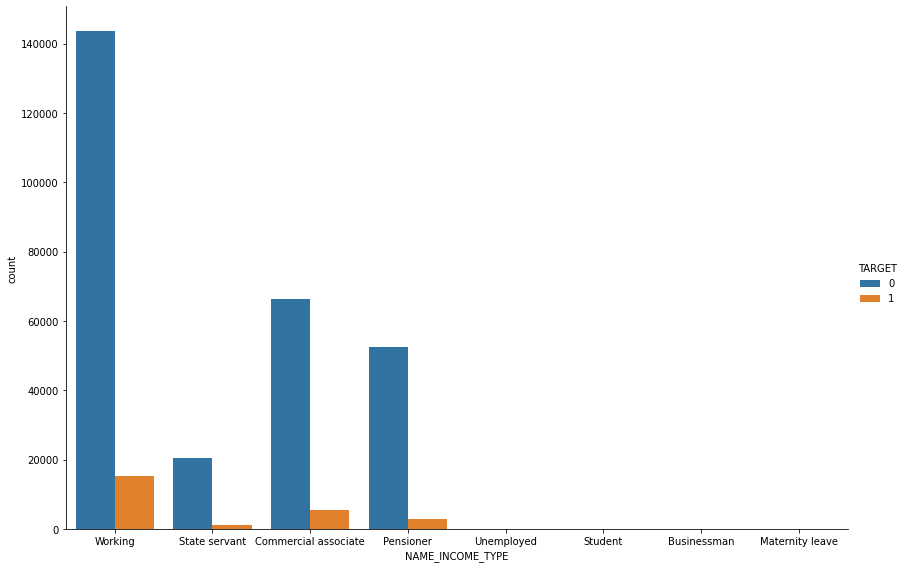

In [91]:
sns.catplot(x='NAME_INCOME_TYPE', kind="count",hue='TARGET', aspect=1.5, height=8,data=application_train)

<h3><b>Interpretation :</b></h3>
<ul>
<li>Rien à conclure</li>
</ul>

<h2>TARGET / NAME_EDUCATION_TYPE (Niveau d'education du client)</h2>

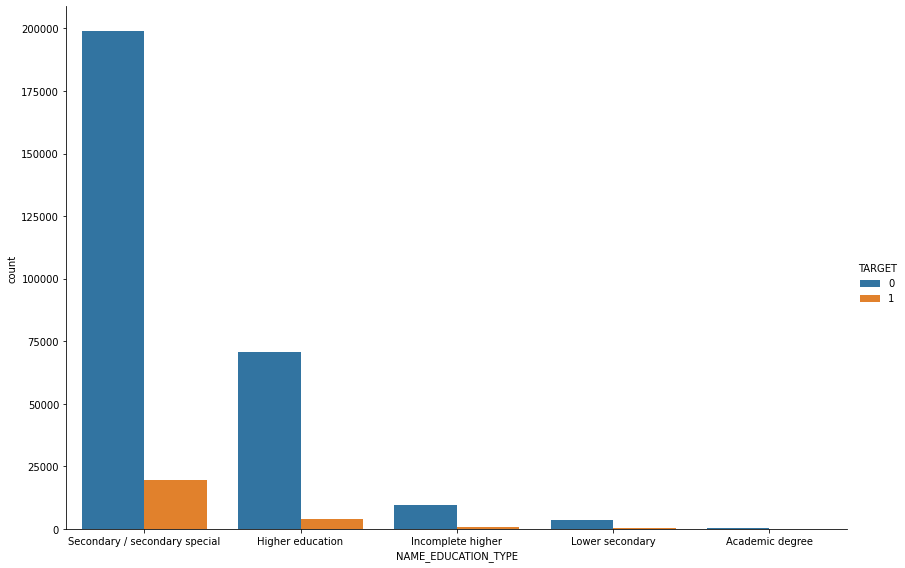

In [92]:
sns.catplot(x='NAME_EDUCATION_TYPE', kind="count",hue='TARGET', aspect=1.5, height=8,data=application_train)

<h3><b>Interpretation :</b></h3>
<ul>
<li>Rien à conclure</li>
</ul>

<h2>TARGET / NAME_FAMILY_STATUS (Etat familiale du client)</h2>

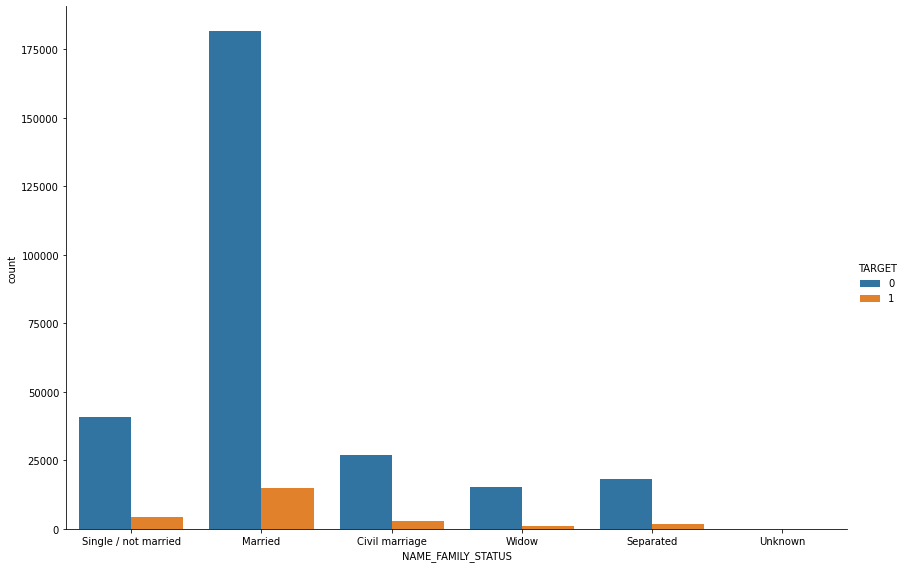

In [93]:
sns.catplot(x='NAME_FAMILY_STATUS', kind="count",hue='TARGET', aspect=1.5, height=8,data=application_train)

<h3><b>Interpretation :</b></h3>
<ul>
<li>Rien à conclure</li>
</ul>

<h2>TARGET / NAME_HOUSING_TYPE (Situation du logement du client)</h2>

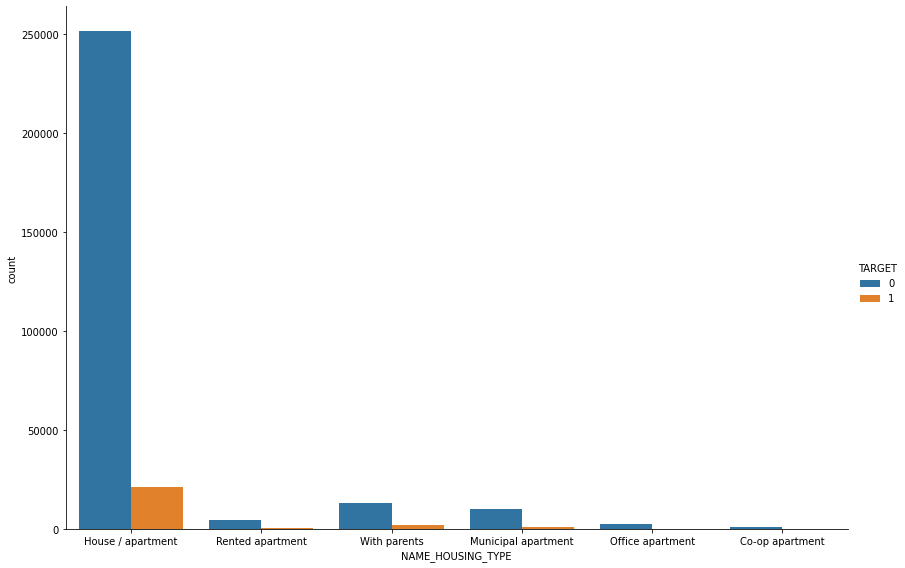

In [94]:
sns.catplot(x='NAME_HOUSING_TYPE', kind="count",hue='TARGET', aspect=1.5, height=8,data=application_train)

<h3><b>Interpretation :</b></h3>
<ul>
<li>Rien à conclure</li>
</ul>

<h2>TARGET / DAYS_BIRTH (Age du client)</h2>

In [104]:
application_train["DAYS_BIRTH"].value_counts()

39.0    9023
38.0    8793
37.0    8727
40.0    8602
41.0    8495
28.0    8467
32.0    8313
42.0    8308
43.0    8265
36.0    8152
44.0    8132
31.0    8021
30.0    7776
35.0    7751
33.0    7729
34.0    7659
29.0    7636
54.0    7489
45.0    7385
46.0    7333
47.0    7202
55.0    7140
53.0    7124
57.0    6926
48.0    6907
49.0    6786
52.0    6740
50.0    6696
56.0    6657
60.0    6612
59.0    6479
51.0    6417
27.0    6413
58.0    6371
61.0    5795
63.0    5467
62.0    5362
64.0    5023
26.0    4364
65.0    4318
25.0    4079
24.0    3815
23.0    3669
66.0    2641
22.0    1990
67.0    1834
68.0    1654
21.0     660
69.0     314
Name: DAYS_BIRTH, dtype: int64

In [100]:
application_train["DAYS_BIRTH"]=np.round(application_train["DAYS_BIRTH"]/-365)

In [101]:
application_train.DAYS_BIRTH.describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

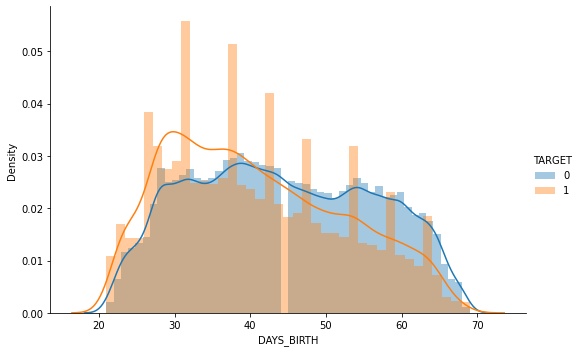

In [102]:
sns.FacetGrid(data=application_train, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'DAYS_BIRTH').add_legend()

<h3><b>Interpretation :</b></h3>
<ul>
<li>Les clients d'age < 40 sont plus risqués que les autres </li>
</ul>

<h2>TARGET / DAYS_EMPLOYED (Combien de jour le client a commencer son travail a partir du jour auquel il a demander un credit*)</h2>

In [105]:
application_train["DAYS_EMPLOYED"].value_counts()

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [108]:
application_train["DAYS_EMPLOYED"]=application_train["DAYS_EMPLOYED"] / -365

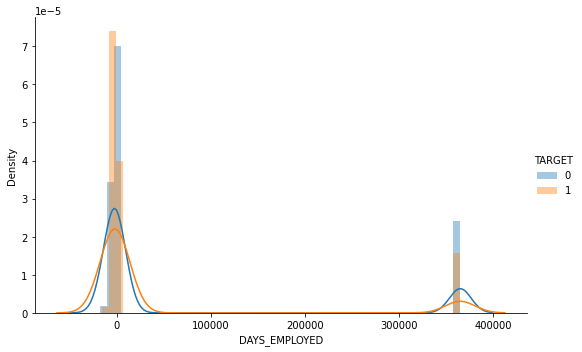

In [112]:
sns.FacetGrid(data=application_train, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'DAYS_EMPLOYED').add_legend()

In [113]:
application_train["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [115]:
365243 / 365

1000.6657534246575

* detection des fausses valeurs = 365243 impossible et il y a des valeurs negatives

In [121]:
application_train[application_train.DAYS_EMPLOYED>0].count()

SK_ID_CURR                    55374
TARGET                        55374
NAME_CONTRACT_TYPE            55374
CODE_GENDER                   55374
FLAG_OWN_CAR                  55374
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     47711
AMT_REQ_CREDIT_BUREAU_WEEK    47711
AMT_REQ_CREDIT_BUREAU_MON     47711
AMT_REQ_CREDIT_BUREAU_QRT     47711
AMT_REQ_CREDIT_BUREAU_YEAR    47711
Length: 122, dtype: int64

<h2>TARGET / DAYS_ID_PUBLISH (Combien de jours avant la demande le client a-t-il modifié le document d'identité avec lequel il a demandé le prêt)</h2>

In [122]:
application_train["DAYS_ID_PUBLISH"].value_counts()

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-5896      1
-5921      1
-5753      1
-5960      1
-6211      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

In [124]:
application_train["DAYS_ID_PUBLISH"] = application_train["DAYS_ID_PUBLISH"]*-1 

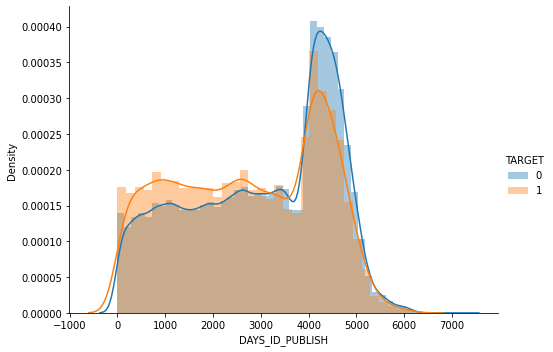

In [125]:
sns.FacetGrid(data=application_train, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'DAYS_ID_PUBLISH').add_legend()

<h3><b>Interpretation :</b></h3>
<ul>
<li>Nombre de jours < 3000 densite de la classe 1 est > densite de la classe 0</li>
</ul>

<h2>TARGET / OWN_CAR_AGE (Age de la voiture du client)</h2>

In [126]:
application_train["OWN_CAR_AGE"].value_counts()

7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
        ... 
69.0       1
50.0       1
47.0       1
48.0       1
52.0       1
Name: OWN_CAR_AGE, Length: 62, dtype: int64

In [127]:
application_train["OWN_CAR_AGE"].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

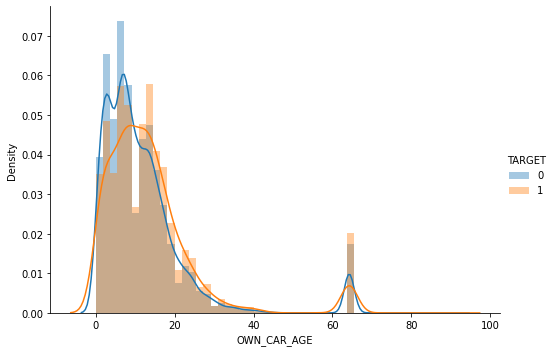

In [128]:
sns.FacetGrid(data=application_train, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'OWN_CAR_AGE').add_legend()

<h3><b>Interpretation :</b></h3>
<ul>
<li>Presence outliers age >40 </li>
<li>age >17 densite classe 1 > densite classe 0 </li>
</ul>

<h2>TARGET / EXT_SOURCE_1 (Score source externe)</h2>

In [129]:
application_train["EXT_SOURCE_1"].describe()

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

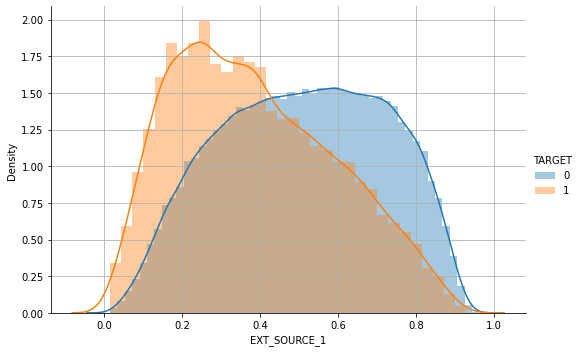

In [131]:
sns.FacetGrid(data=application_train, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'EXT_SOURCE_1').add_legend()
plt.grid()
plt.show()

<h3><b>Interpretation :</b></h3>
<ul>
<li>score > 0.42 ==> client non risque</li>
</ul>

<h2>TARGET / EXT_SOURCE_2 (Score source externe)</h2>

In [132]:
application_train["EXT_SOURCE_2"].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

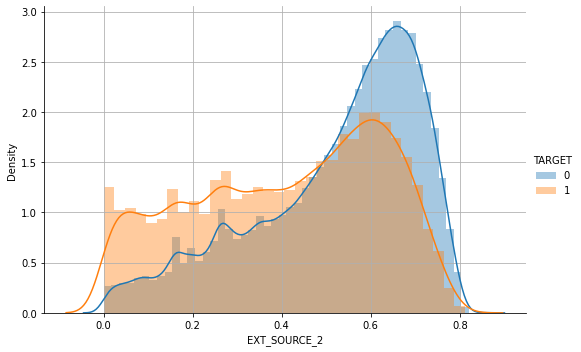

In [133]:
sns.FacetGrid(data=application_train, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'EXT_SOURCE_2').add_legend()
plt.grid()
plt.show()

<h3><b>Interpretation :</b></h3>
<ul>
<li>score > 0.5 ==> client non risque</li>
</ul>

<h2>TARGET / EXT_SOURCE_3 (Score source externe)</h2>

In [134]:
application_train["EXT_SOURCE_3"].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

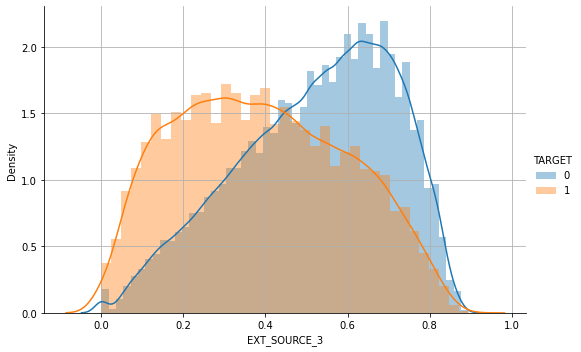

In [135]:
sns.FacetGrid(data=application_train, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'EXT_SOURCE_3').add_legend()
plt.grid()
plt.show()

<h3><b>Interpretation :</b></h3>
<ul>
<li>score > 0.42 ==> client non risque</li>
</ul>

<h2>TARGET / HOUR_APPR_PROCESS_START (Le jour de la demande du credit)</h2>

In [137]:
application_train["HOUR_APPR_PROCESS_START"].describe()

count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64

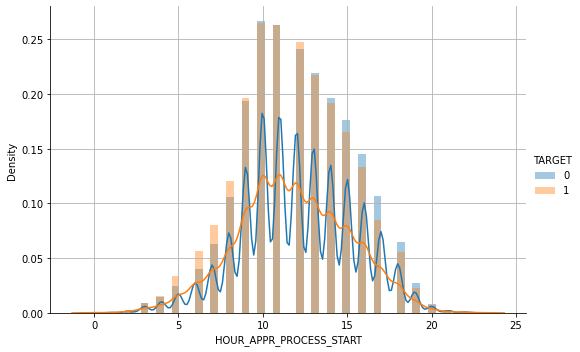

In [138]:
sns.FacetGrid(data=application_train, hue='TARGET', aspect=1.5, height=5).map(sns.distplot, 'HOUR_APPR_PROCESS_START').add_legend()
plt.grid()
plt.show()

<h2>TARGET / WEEKDAY_APPR_PROCESS_START (Jour du demande du credit)</h2>

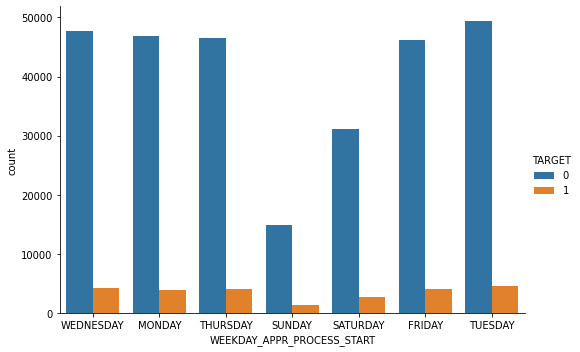

In [140]:
sns.catplot(x='WEEKDAY_APPR_PROCESS_START', kind="count",hue='TARGET', data=application_train, aspect=1.5, height=5)

<h2>TARGET / Documents (Documents fournie)</h2>

In [141]:
documents_provided=["FLAG_DOCUMENT_{}".format(i) for i in range(2,22)]

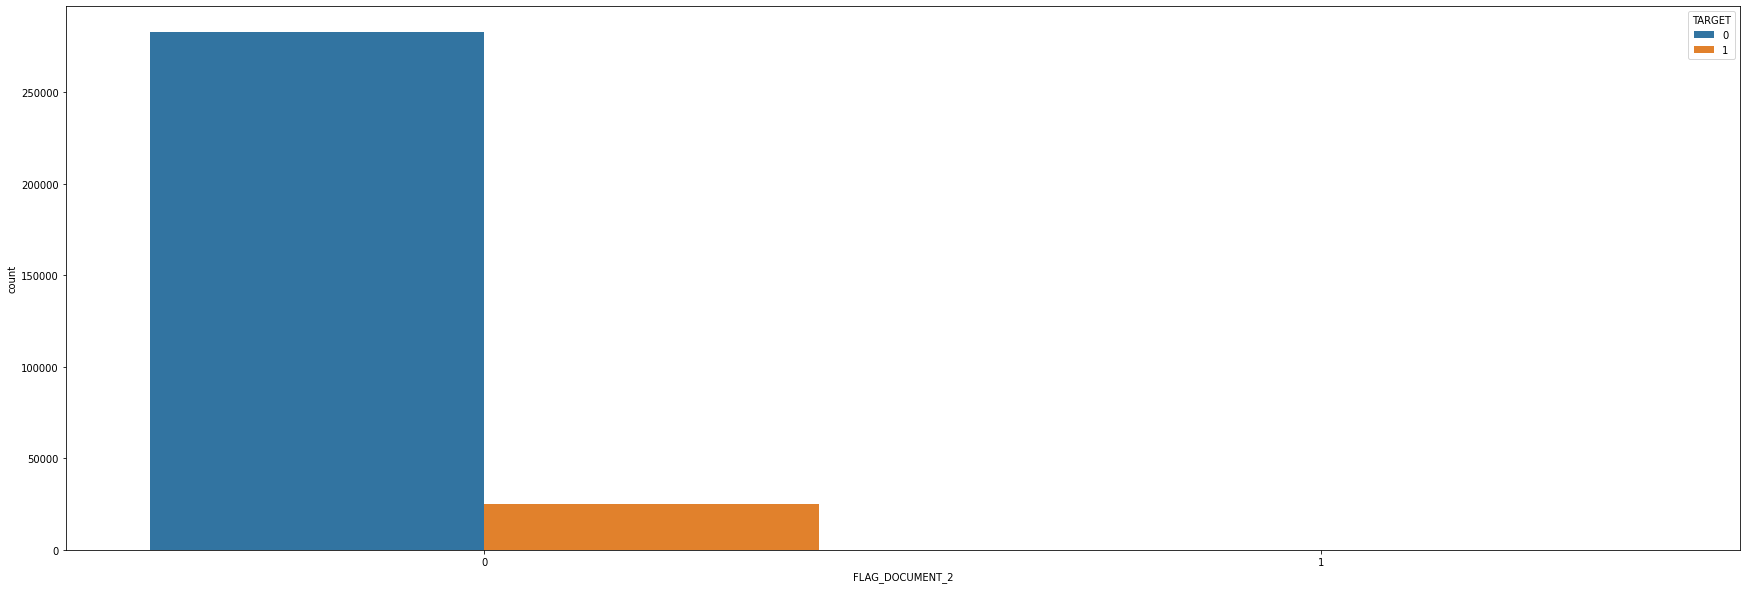

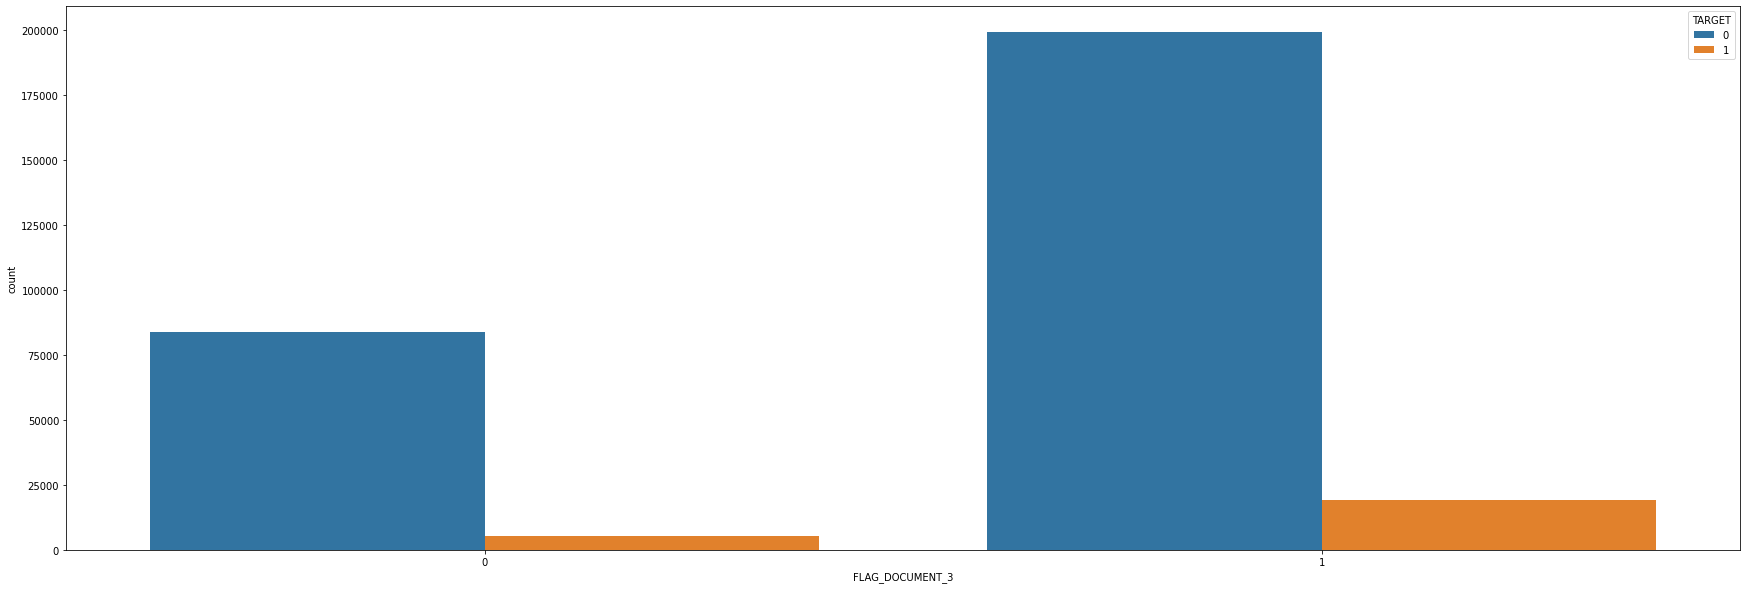

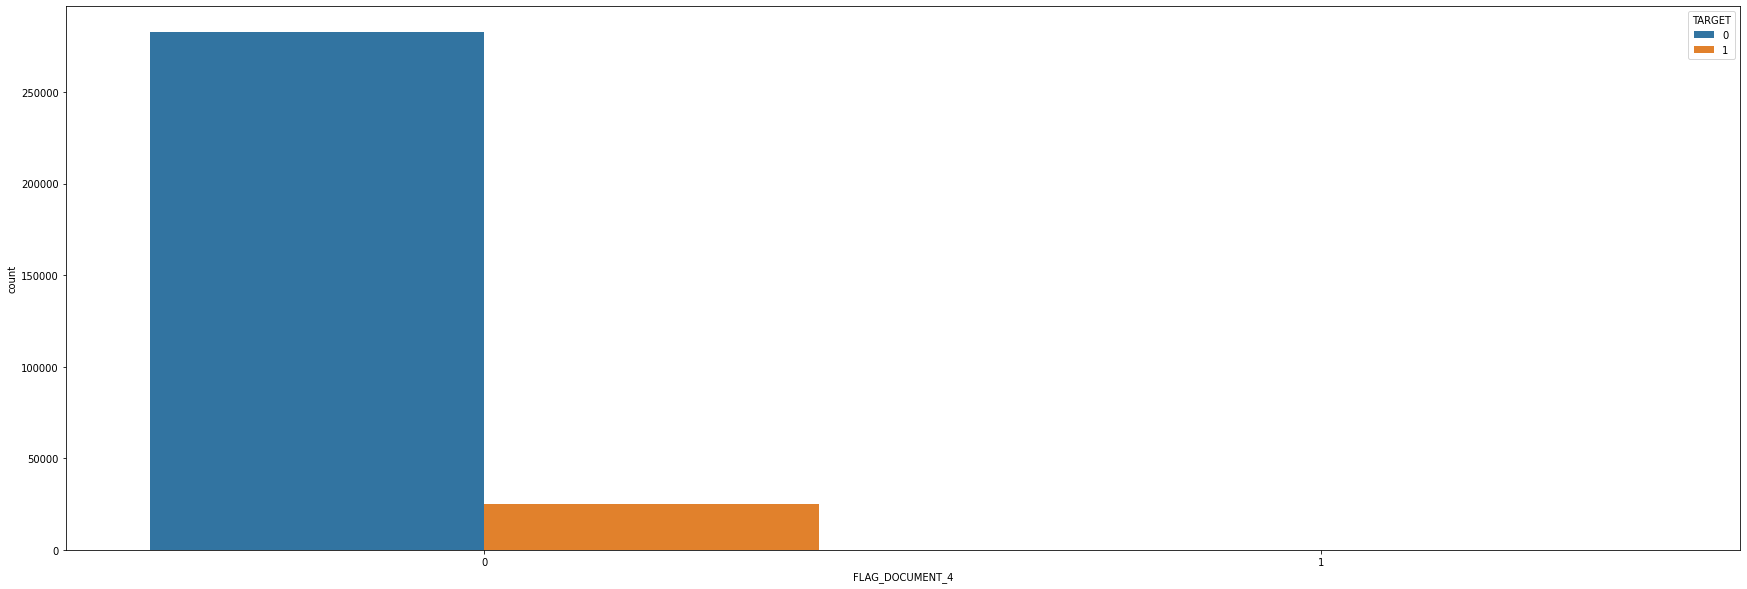

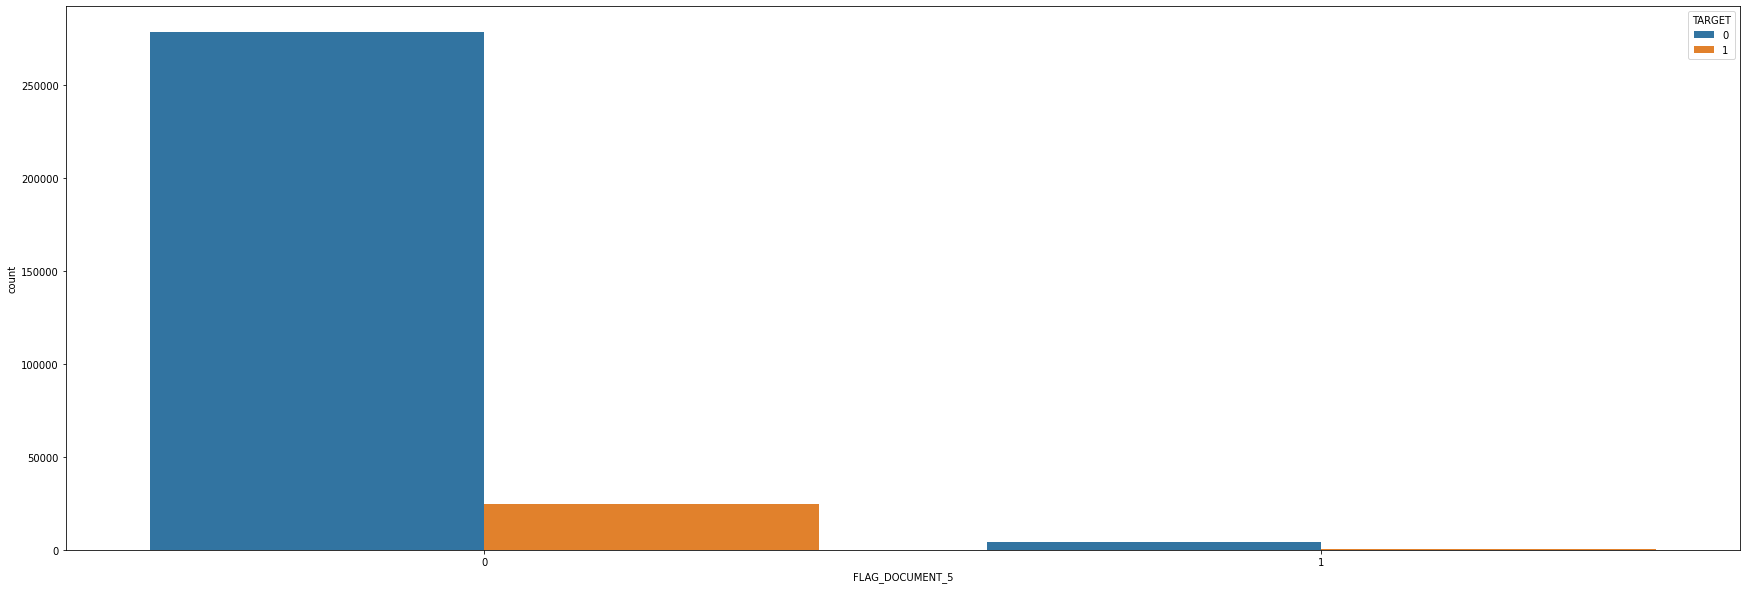

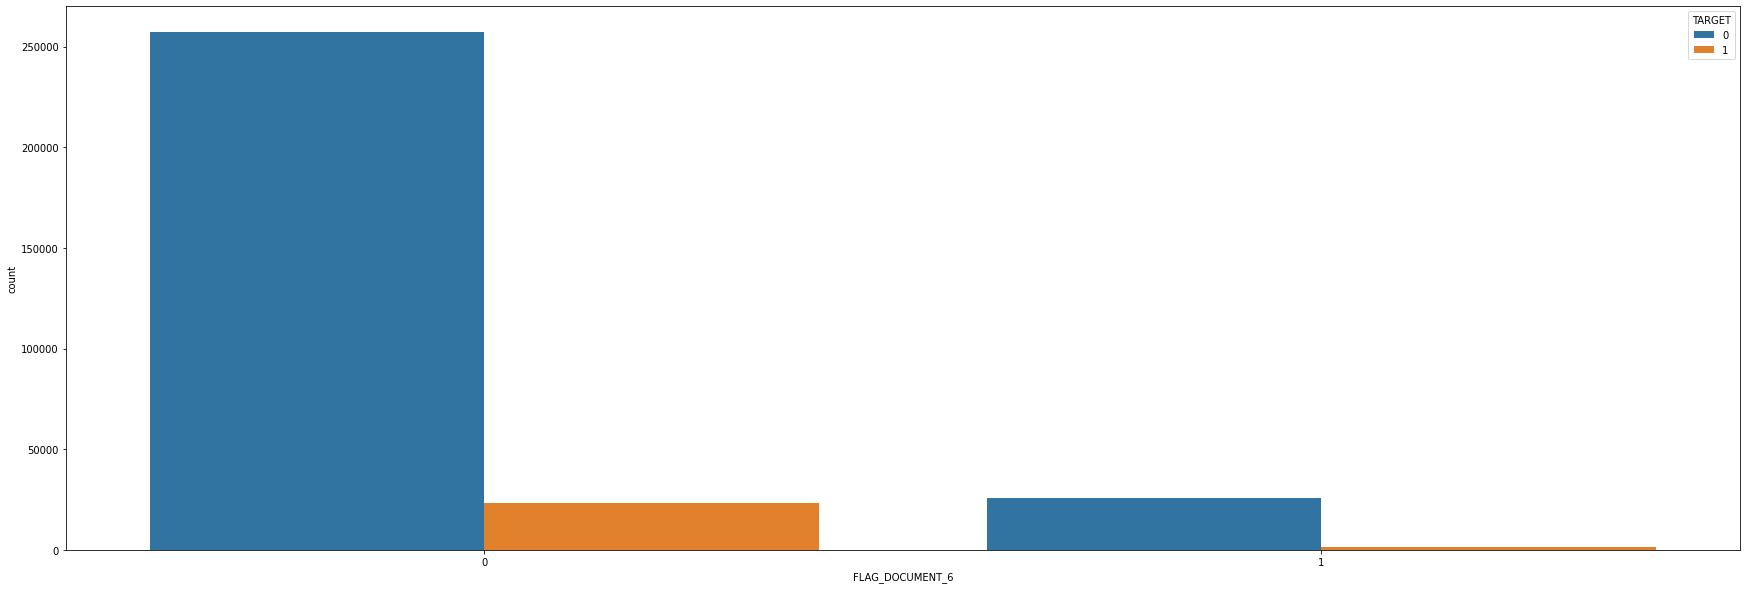

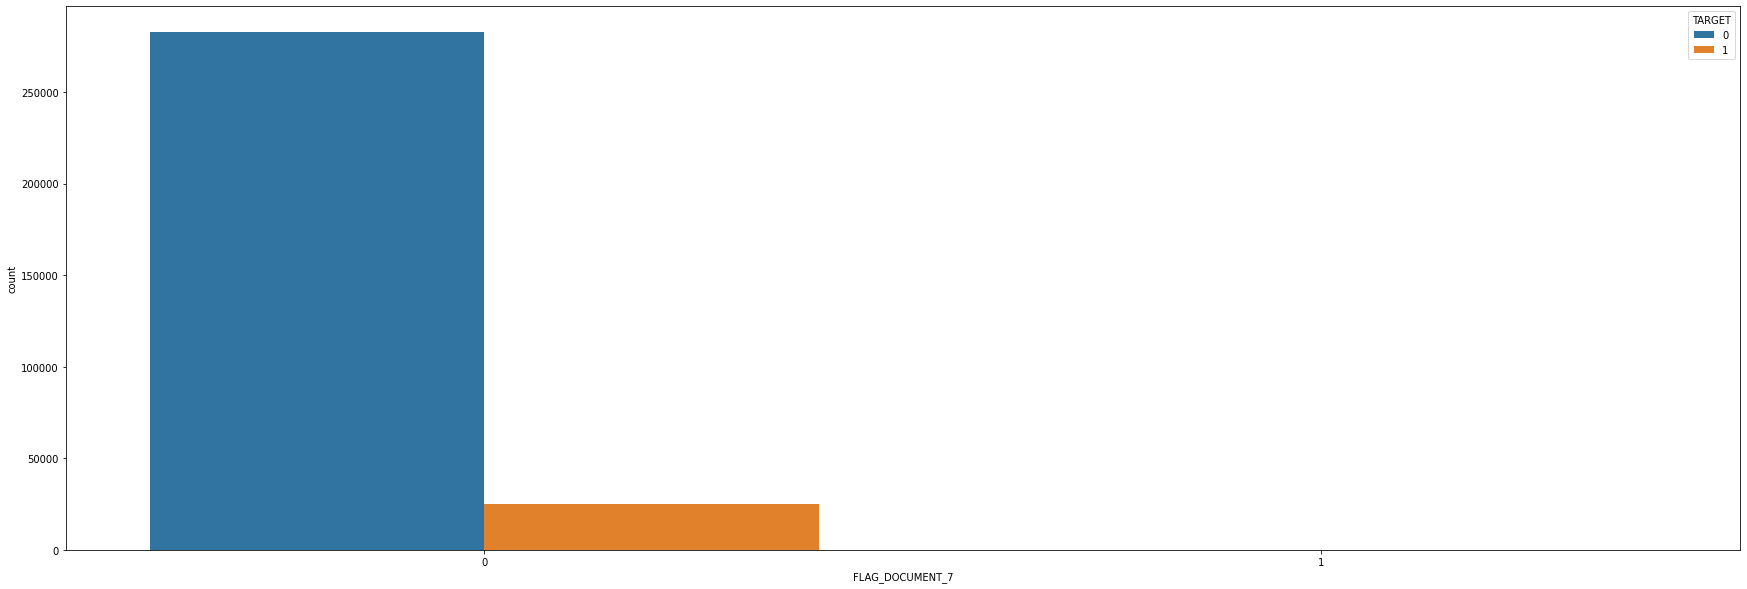

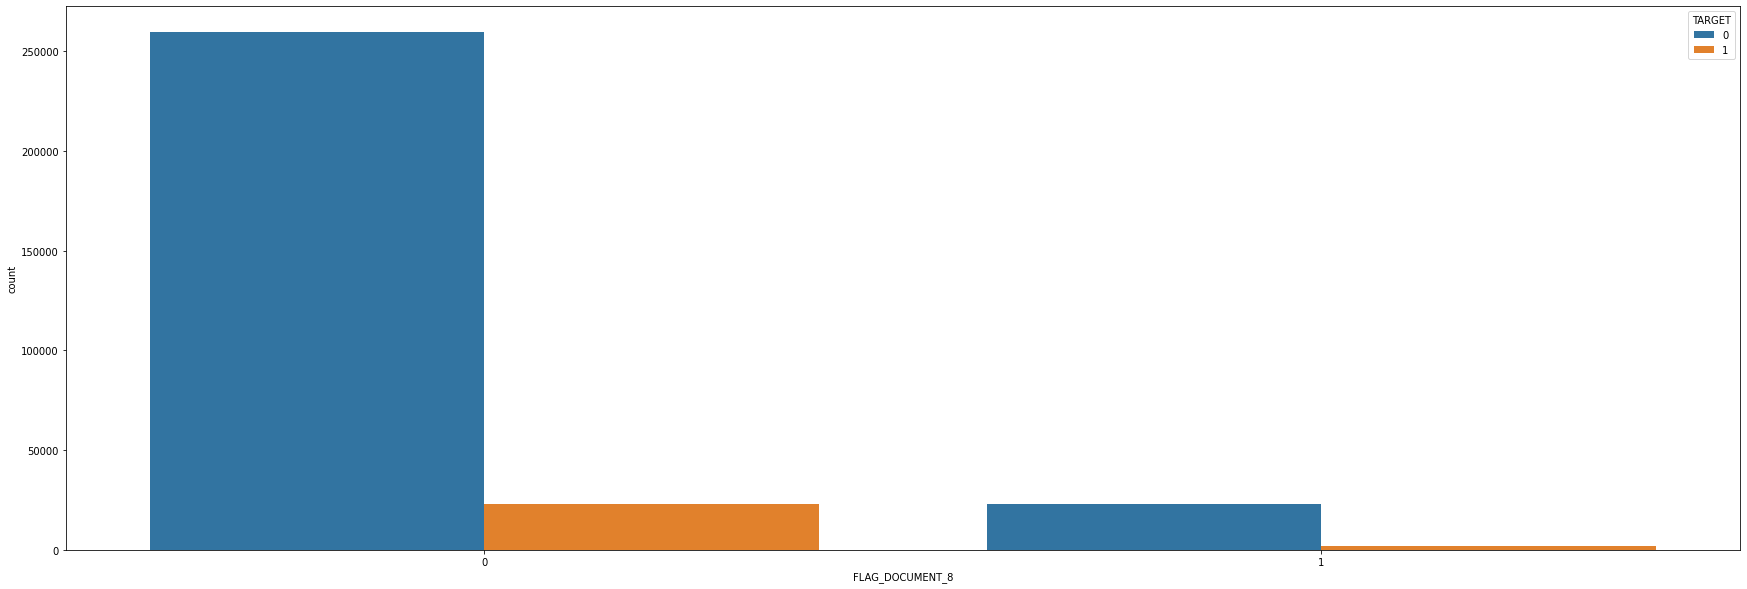

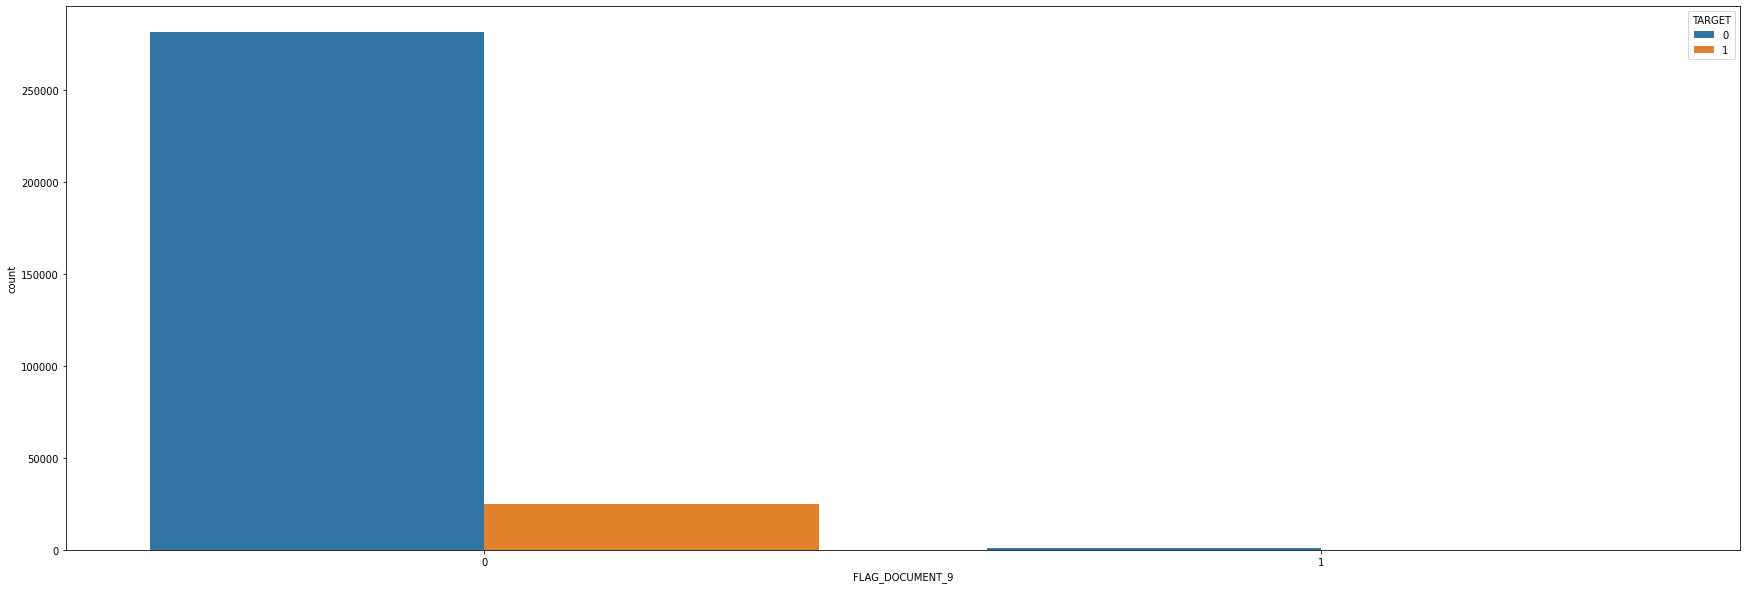

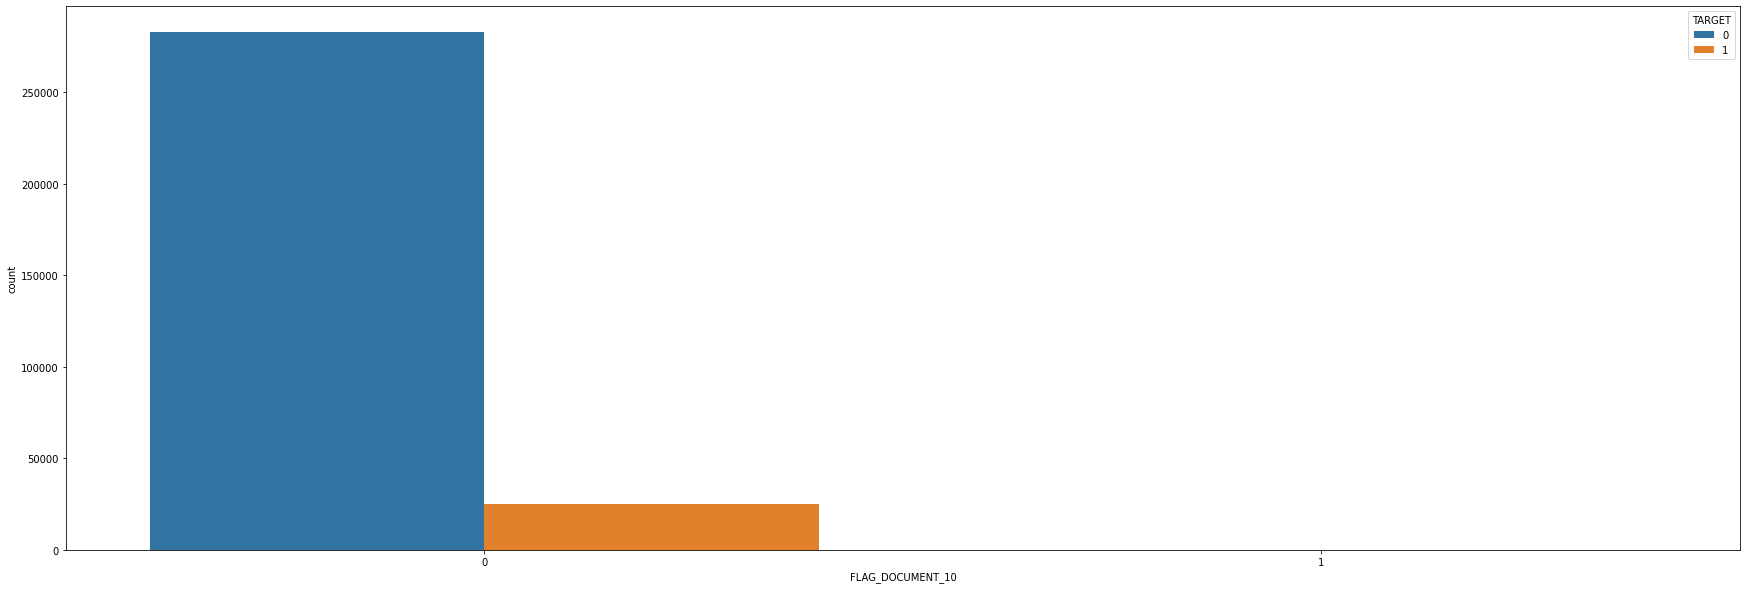

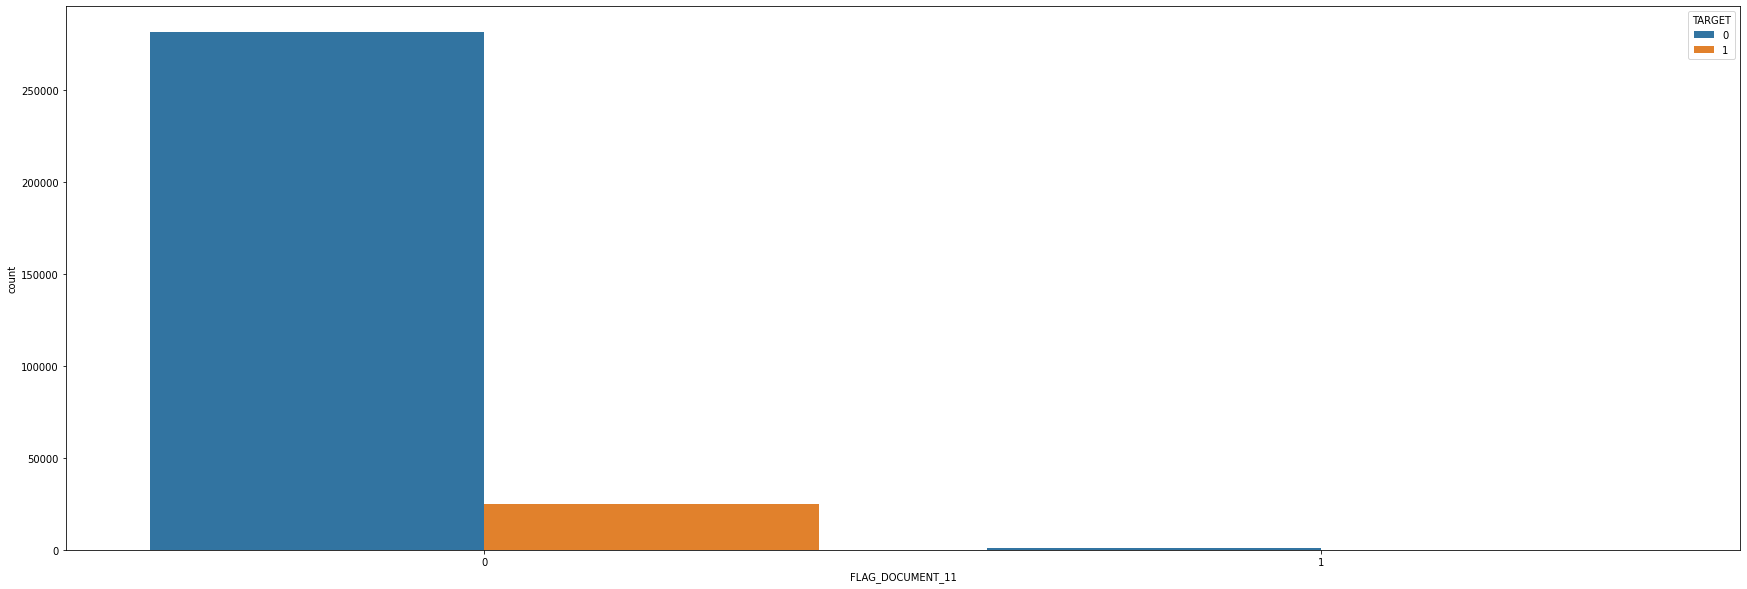

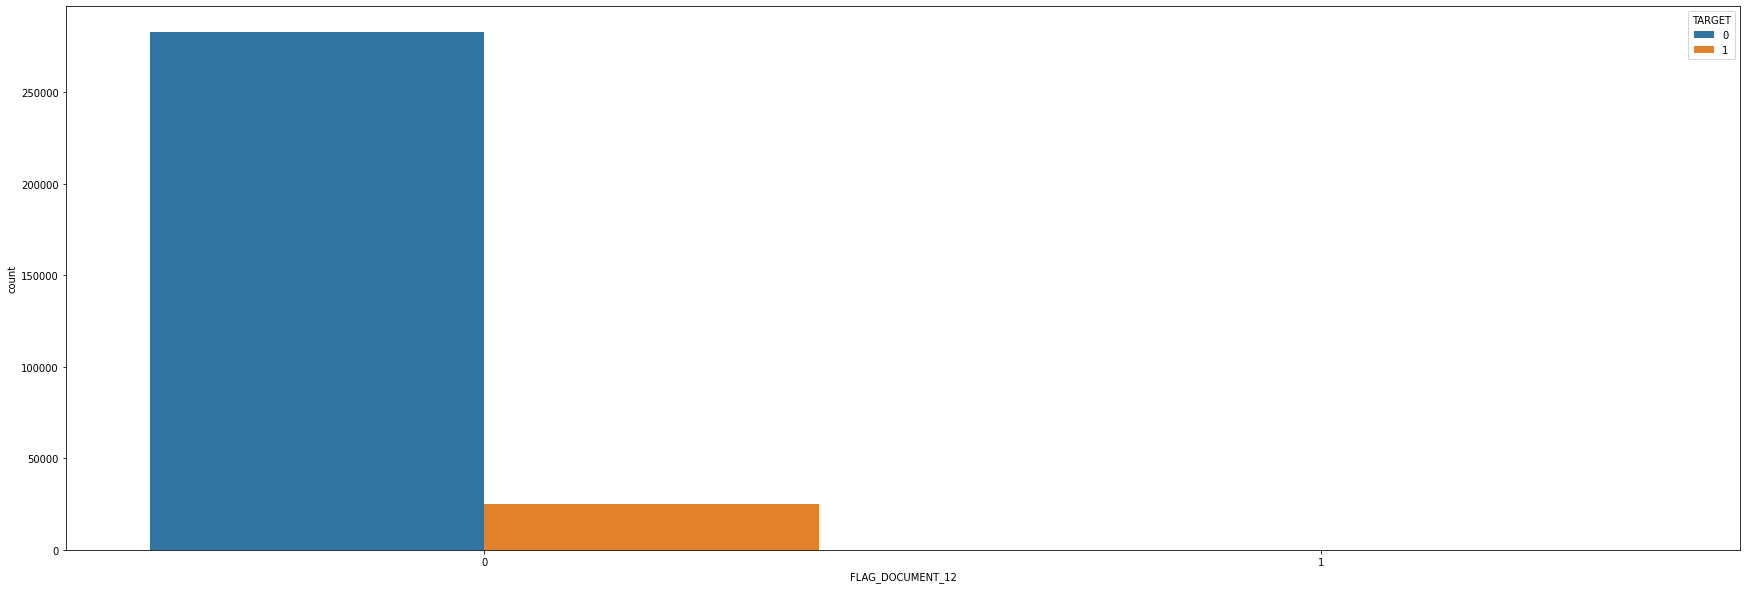

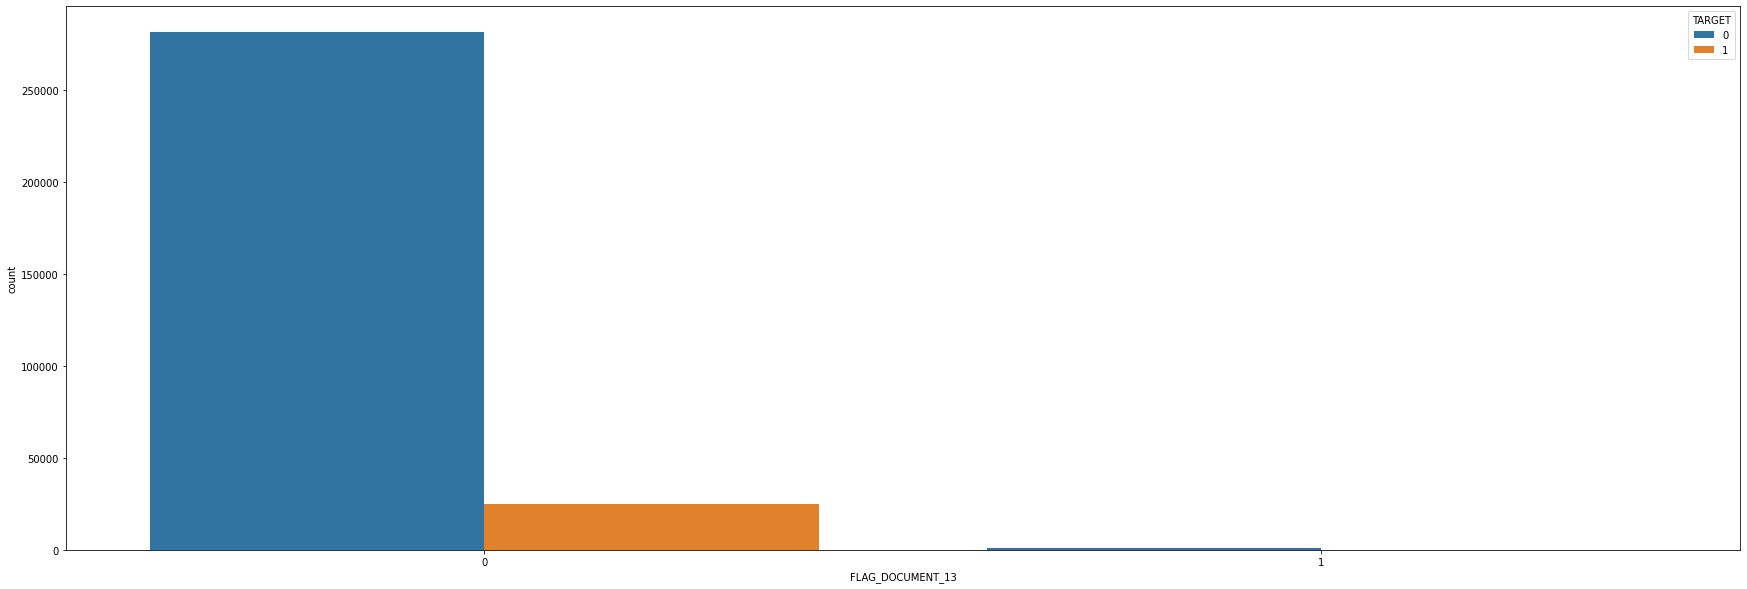

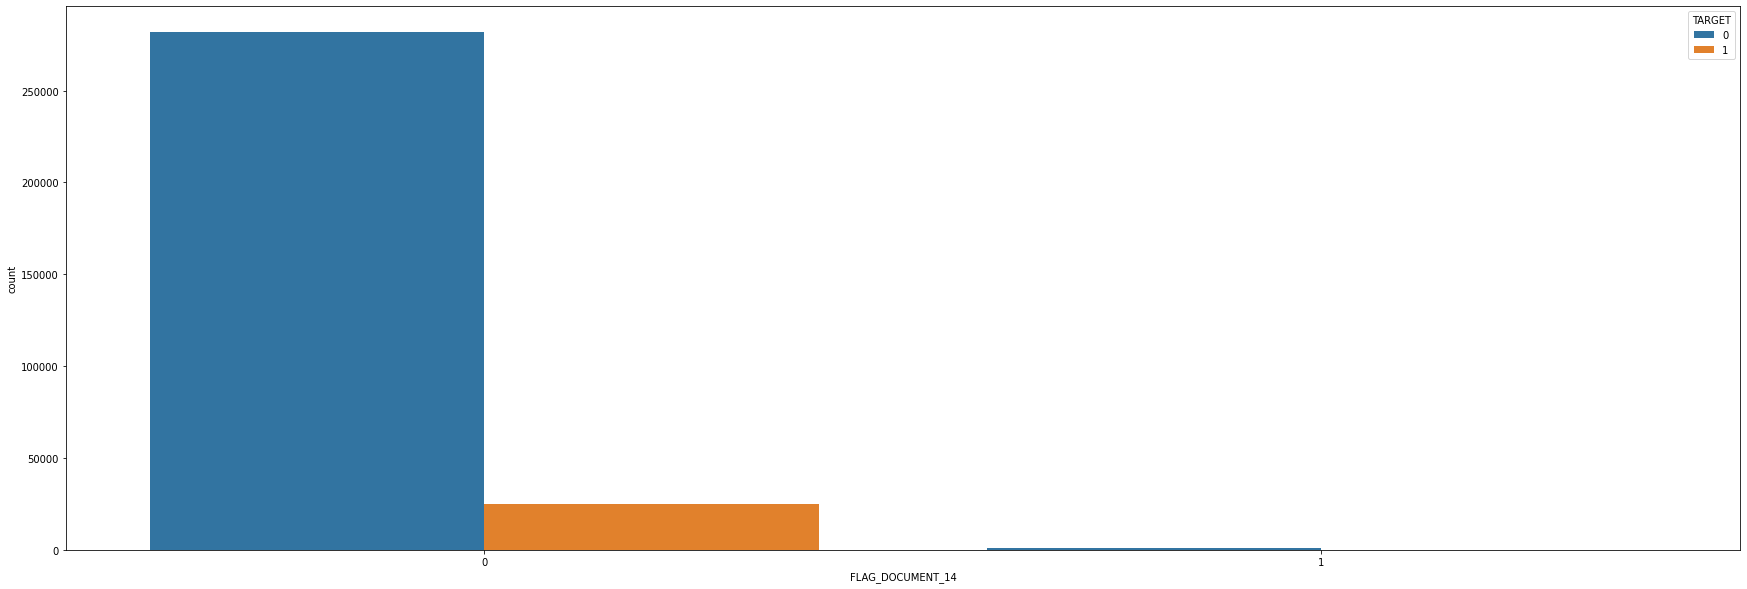

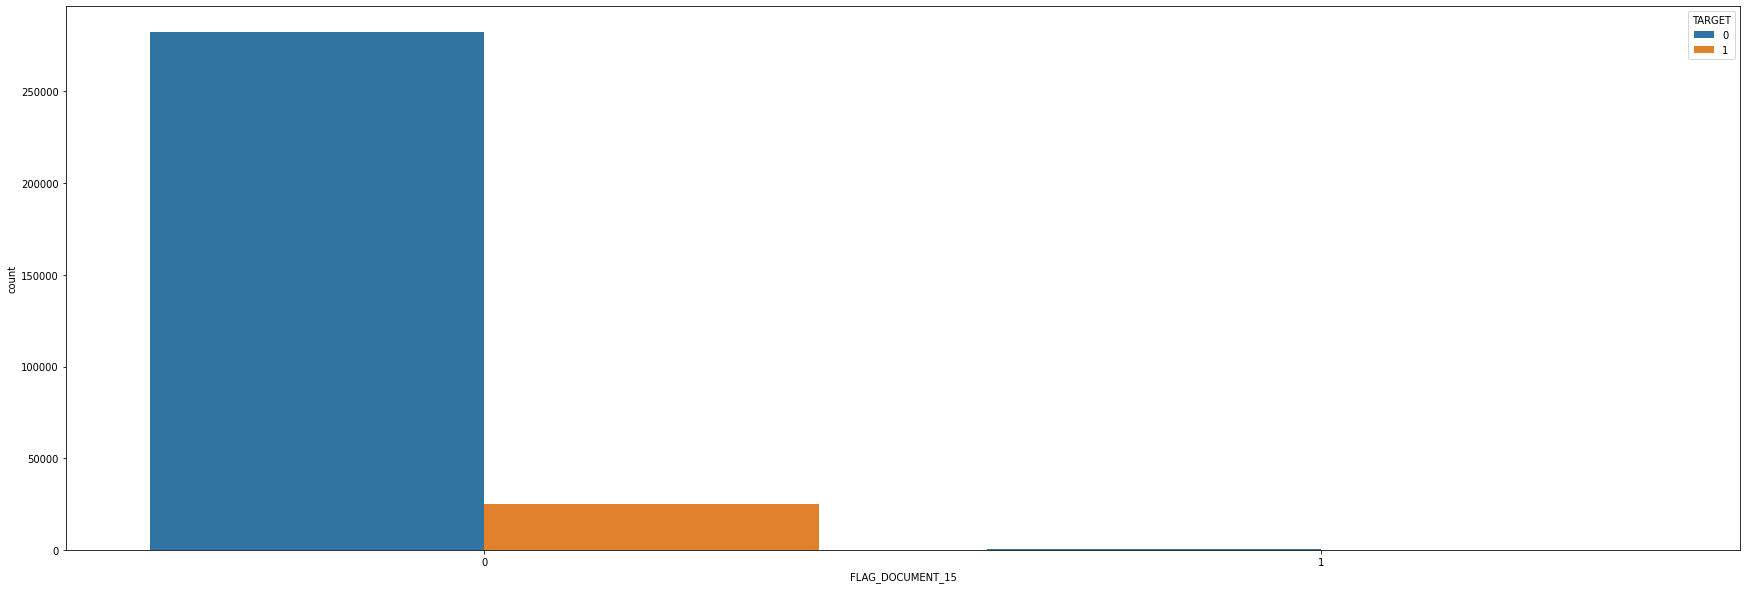

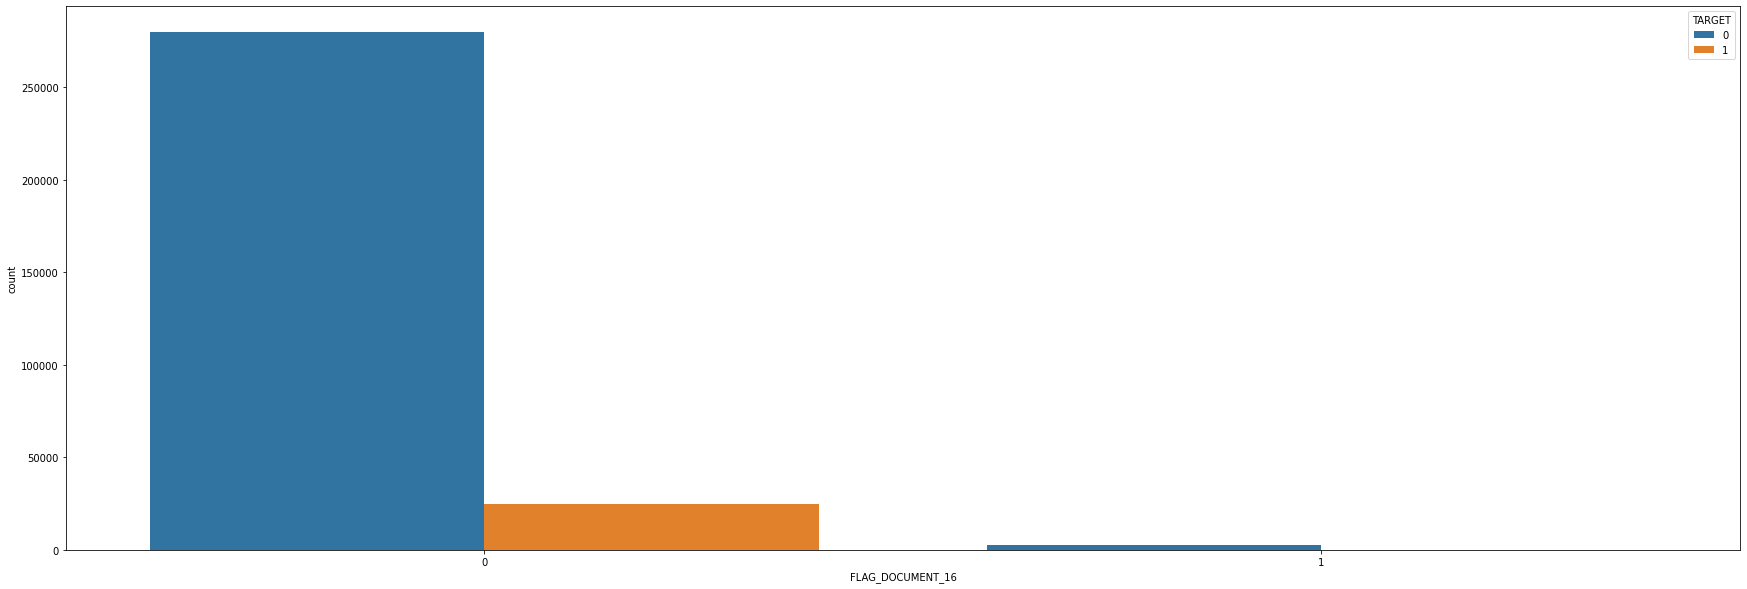

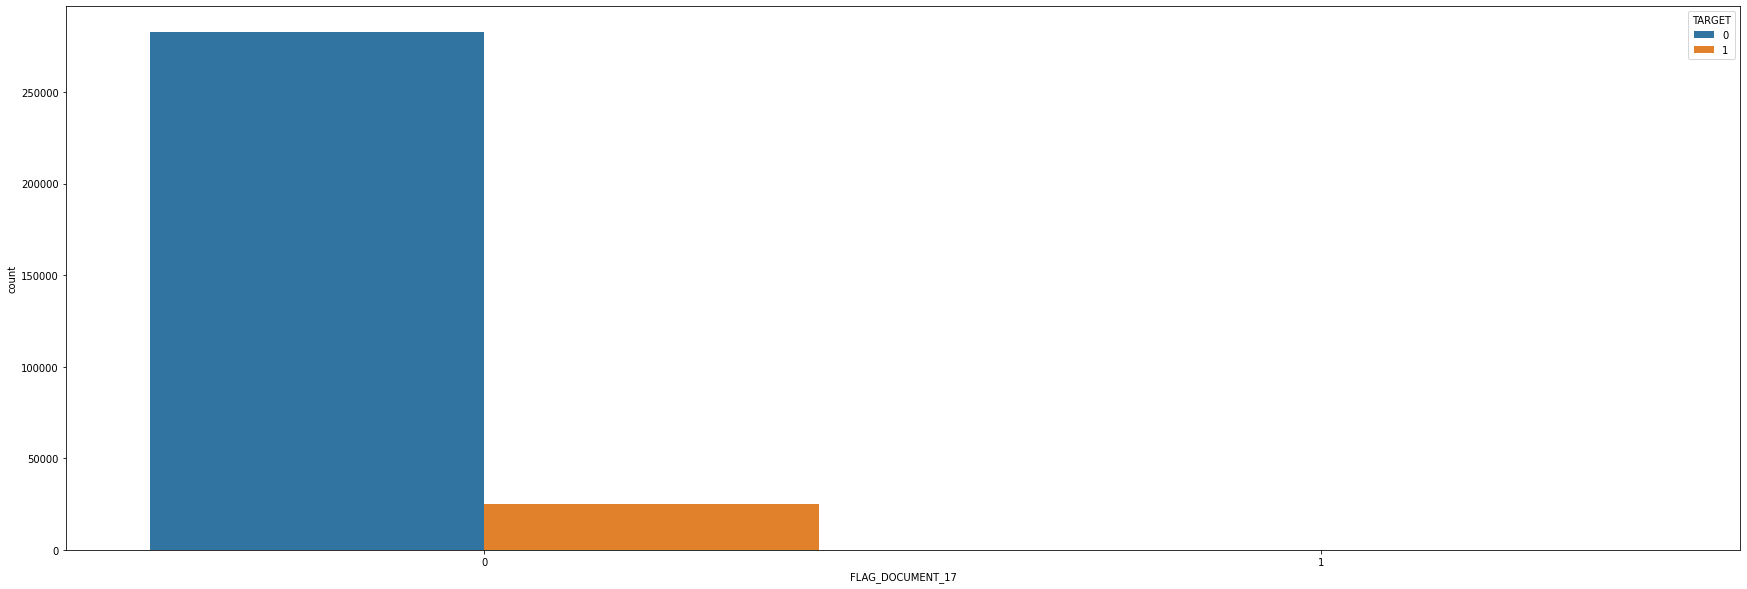

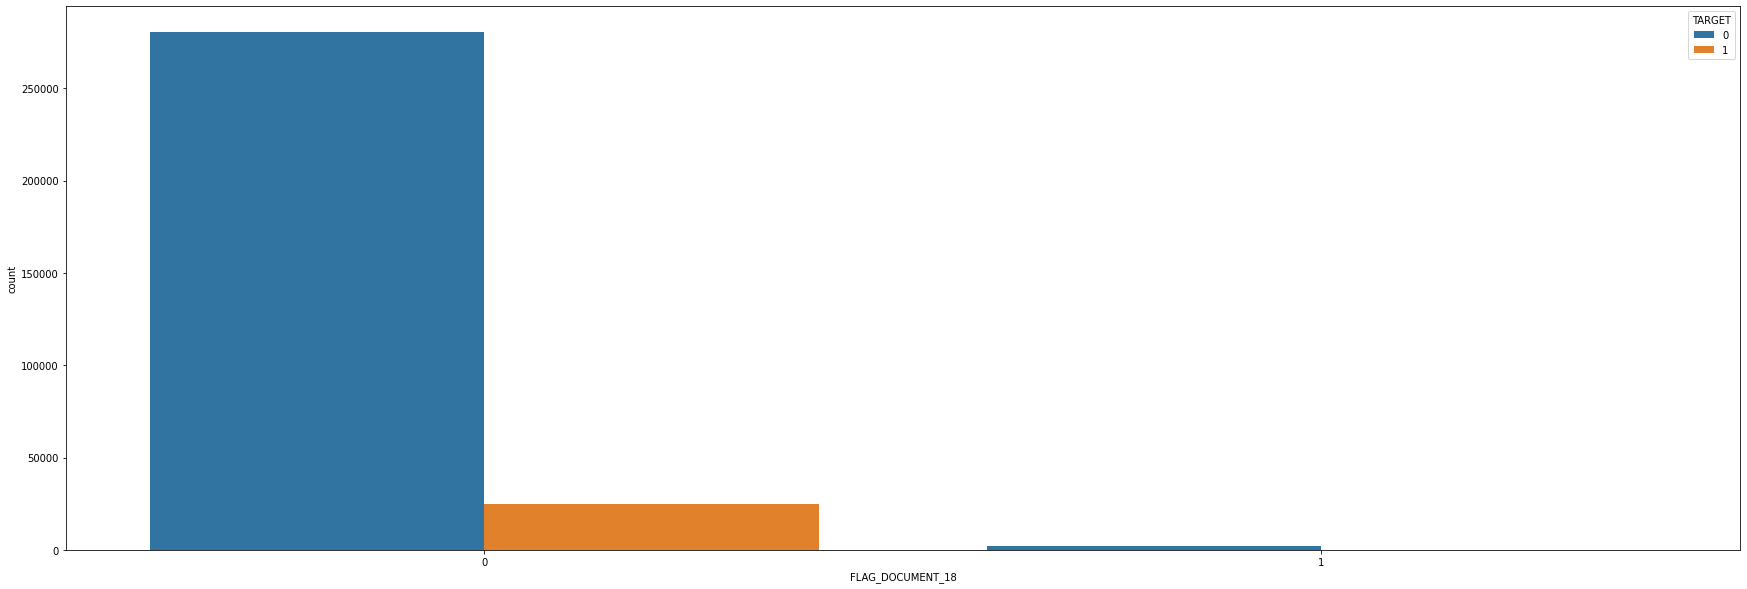

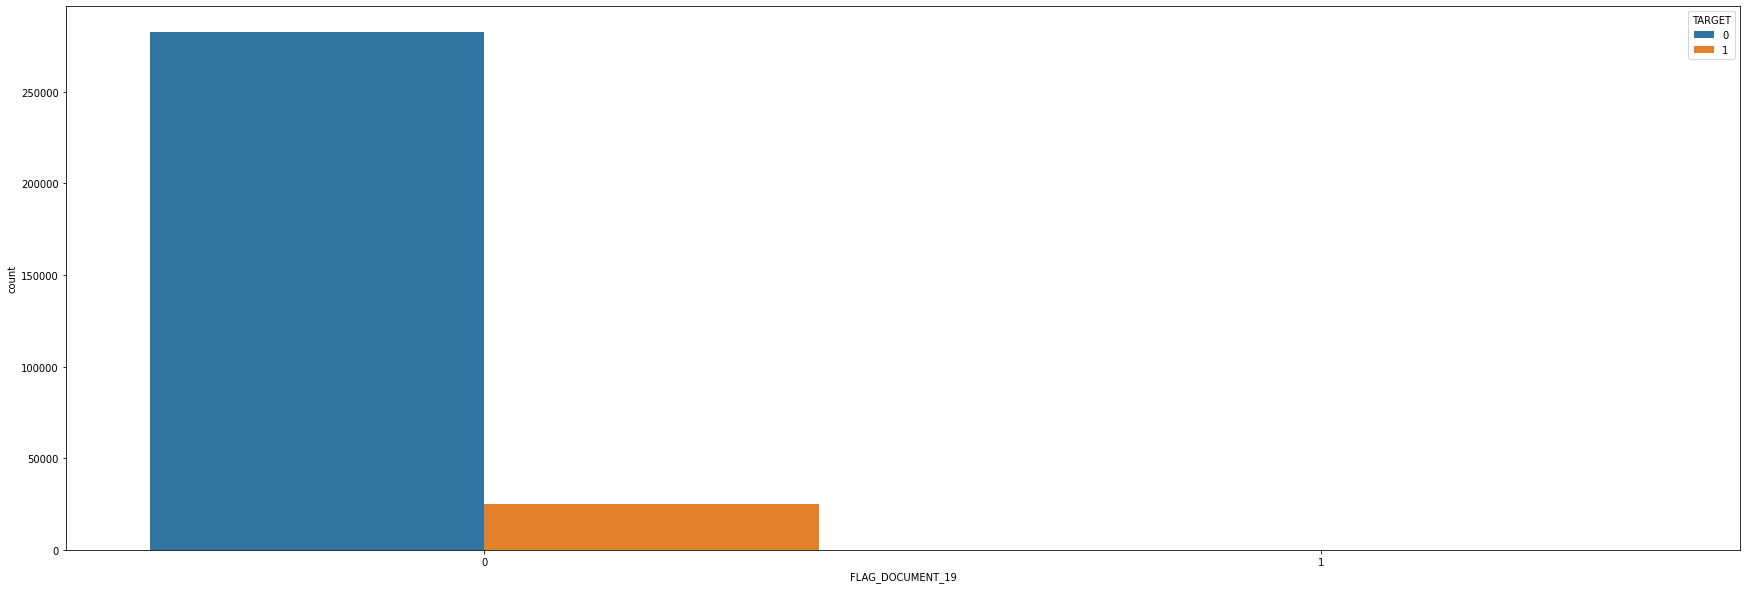

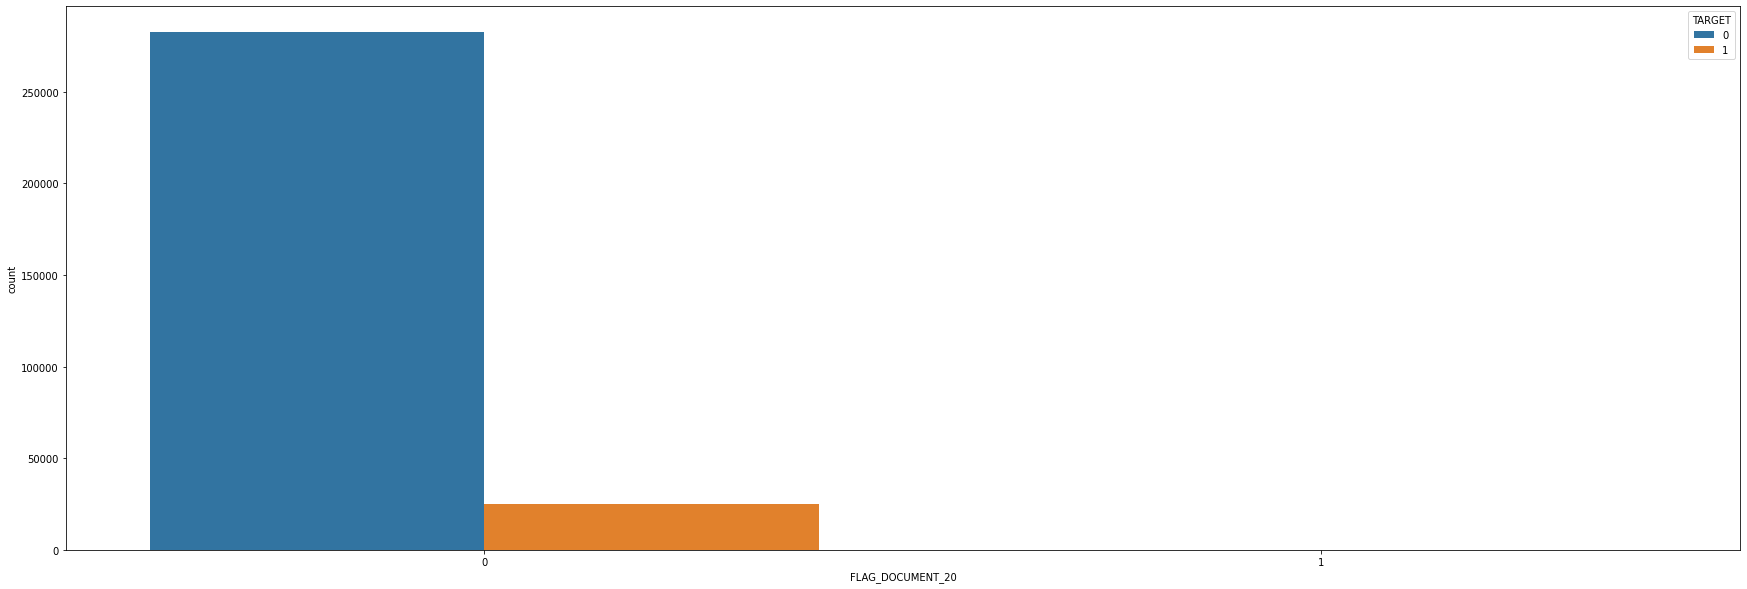

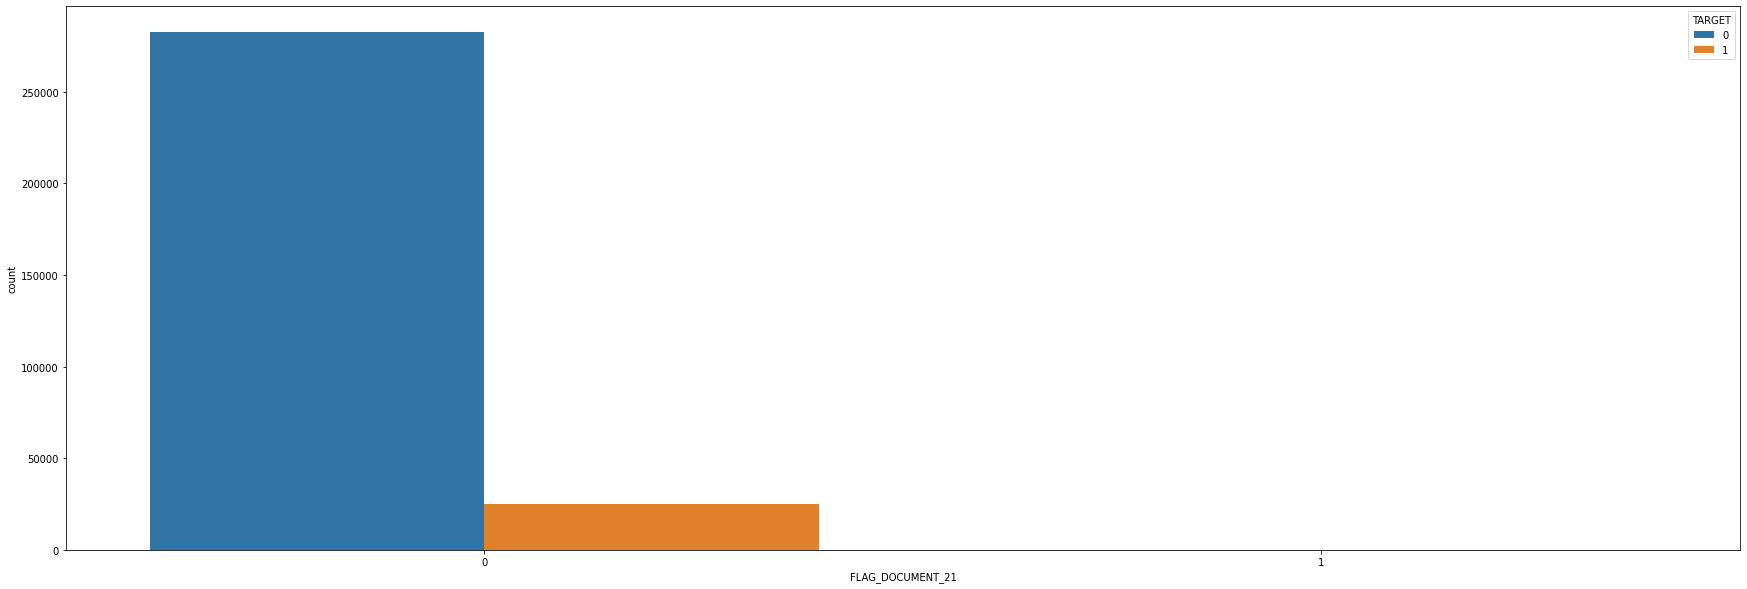

In [142]:
for i in documents_provided :
    plt.figure(figsize=(30,10))
    sns.countplot(x=i, hue="TARGET", data=application_train)
    plt.show()

<h3><b>Interpretation :</b></h3>
<ul>
<li>Le document trois est le plus important</li>
</ul>